In [204]:
from sklearn.datasets import load_boston
import pandas as pd
data =  pd.read_csv(load_boston()['filename'], skiprows=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
data.shape

(506, 14)

In [ ]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
boston=data.copy()

In [ ]:
for i in boston.columns:
    q75,q25=np.percentile(boston.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    boston.loc[boston.loc[:,i]<min,i]=np.nan
    boston.loc[boston.loc[:,i]>max,i]=np.nan
    print(i, ', отсутствующих значений:', boston.loc[:,i].isnull().sum())

CRIM , отсутствующих значений: 66
ZN , отсутствующих значений: 68
INDUS , отсутствующих значений: 0
CHAS , отсутствующих значений: 35
NOX , отсутствующих значений: 0
RM , отсутствующих значений: 30
AGE , отсутствующих значений: 0
DIS , отсутствующих значений: 5
RAD , отсутствующих значений: 0
TAX , отсутствующих значений: 0
PTRATIO , отсутствующих значений: 15
B , отсутствующих значений: 77
LSTAT , отсутствующих значений: 7
MEDV , отсутствующих значений: 40


In [ ]:
#Вычислим отсутствующие значения для каждого атрибута.
cdf=pd.DataFrame(boston.isnull().sum())
cdf=cdf.sort_values(0, ascending=False)
cdf=cdf.rename(columns={0:'отсутствующие значения'})
print(cdf)

         отсутствующие значения
B                            77
ZN                           68
CRIM                         66
MEDV                         40
CHAS                         35
RM                           30
PTRATIO                      15
LSTAT                         7
DIS                           5
INDUS                         0
NOX                           0
AGE                           0
RAD                           0
TAX                           0


In [ ]:
#Замена всех выброшенных значений средними значениями датасета boston
#Среднее теперь не учитывает те самые выброшенные значения
for i in boston.columns:
    boston[i]=boston[i].fillna(boston[i].mean())

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

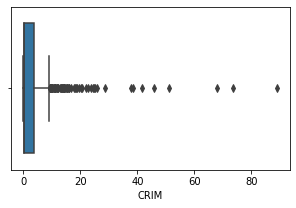

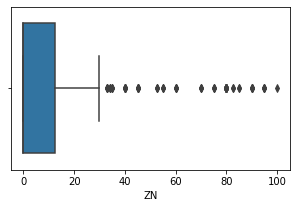

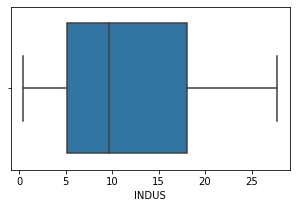

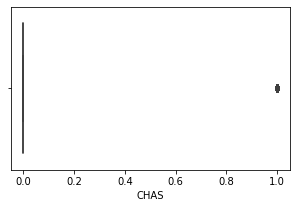

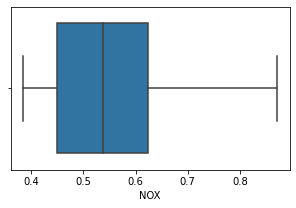

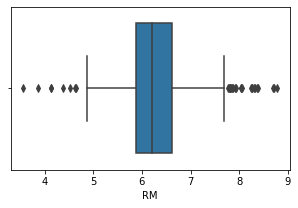

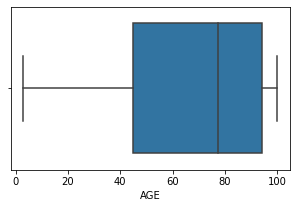

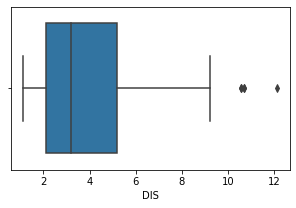

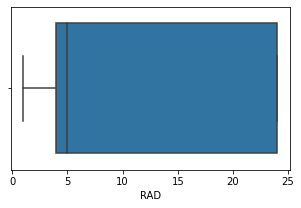

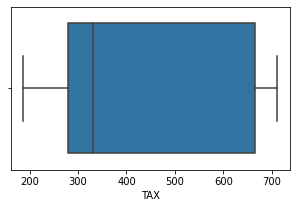

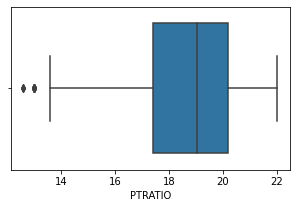

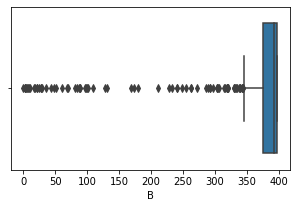

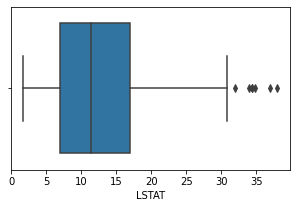

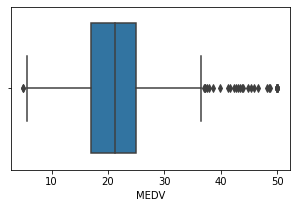

In [ ]:
for i in boston.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[i])

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# нормализуем данные

boston[boston.columns[:-1]] = boston[boston.columns[:-1]].apply(
    lambda x: (x - x.mean()) / x.std()
)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.600753,2.035108,-1.286636,NaN,-0.144075,0.660477,-0.119895,0.185022,-0.981871,-0.665949,-1.717237,0.796079,-1.109989,24.0
1,-0.590174,-0.438840,-0.592794,NaN,-0.739530,0.362885,0.366803,0.628053,-0.867024,-0.986353,-0.425943,0.796079,-0.482652,21.6
2,-0.590184,-0.438840,-0.592794,NaN,-0.739530,1.839253,-0.265549,0.628053,-0.867024,-0.986353,-0.425943,0.400677,-1.253252,34.7
3,-0.587624,-0.438840,-1.305586,NaN,-0.834458,1.477890,-0.809088,1.181197,-0.752178,-1.105022,0.038923,0.575547,-1.417626,33.4
4,-0.569138,-0.438840,-1.305586,NaN,-0.834458,1.765821,-0.510674,1.181197,-0.752178,-1.105022,0.038923,0.796079,-1.057209,36.2


In [ ]:
boston['CHAS'] = - 0.272329

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.600753,2.035108,-1.286636,-0.272329,-0.144075,0.660477,-0.119895,0.185022,-0.981871,-0.665949,-1.717237,0.796079,-1.109989,24.0
1,-0.590174,-0.438840,-0.592794,-0.272329,-0.739530,0.362885,0.366803,0.628053,-0.867024,-0.986353,-0.425943,0.796079,-0.482652,21.6
2,-0.590184,-0.438840,-0.592794,-0.272329,-0.739530,1.839253,-0.265549,0.628053,-0.867024,-0.986353,-0.425943,0.400677,-1.253252,34.7
3,-0.587624,-0.438840,-1.305586,-0.272329,-0.834458,1.477890,-0.809088,1.181197,-0.752178,-1.105022,0.038923,0.575547,-1.417626,33.4
4,-0.569138,-0.438840,-1.305586,-0.272329,-0.834458,1.765821,-0.510674,1.181197,-0.752178,-1.105022,0.038923,0.796079,-1.057209,36.2


In [ ]:
# преобразуем X и y в numpy-формат

X = boston.drop('MEDV', axis=1).to_numpy()
Y = boston['MEDV'].to_numpy()

In [ ]:
# разобьём датасет на обучающий и тестовый для оценки качества

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [ ]:
# преобразуем выборки в тензоры

X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float).view(-1, 1)

In [ ]:
# обернём выборки в TensorDataset и DataLoader-ы

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [ ]:
# инициализуем случайные нормированные через std=0.1 веса и нулевые bias

torch.nn.init.normal_(model[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(model[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [ ]:
trainer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
loss = torch.nn.MSELoss(reduction='mean')

In [ ]:
# сохраним все значения функции потерь
# и построим график лоссов после завершения обучения

num_epochs = 100
losses = []

for epoch in tqdm(range(1, num_epochs + 1)):
    for x, y in train_loader:
        output = model(x)
        curr_loss = loss(output, y)
        losses.append(curr_loss.item())
        trainer.zero_grad()
        curr_loss.backward()
        trainer.step()

100%|██████████| 100/100 [00:01<00:00, 83.14it/s]


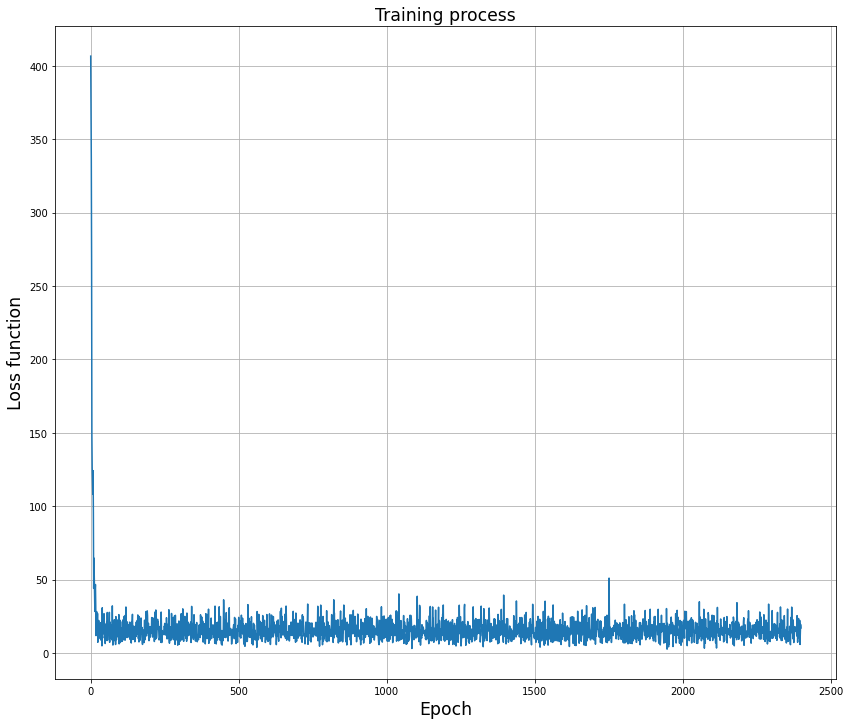

In [ ]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process', fontsize='xx-large')
plt.xlabel('Epoch', fontsize='xx-large')
plt.ylabel('Loss function', fontsize='xx-large')
plt.show()

In [ ]:
losses[-1]

17.02357292175293

In [ ]:
loss(model(X_test), y_test).item()

14.038129806518555

Классика машинного обучения

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(columns=['MEDV']), boston.MEDV, test_size=0.25)

In [203]:
from sklearn.preprocessing import StandardScaler

In [205]:
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

In [206]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nЦена дома в тестовой выборке, реальная, предсказанная и отклонение:')
pd.DataFrame({'True': y_test.round(2), 'Predicted': y_pred.round(2), 'Deviation, %': (y_pred - y_test)/y_test}).round(2)


Цена дома в тестовой выборке, реальная, предсказанная и отклонение:


,True,Predicted,"Deviation, %"
222,27.50,25.32,-0.08
403,8.30,10.74,0.29
161,20.72,29.40,0.42
277,33.10,28.34,-0.14
298,22.50,26.27,0.17
...,...,...,...
66,19.40,21.94,0.13
489,7.00,9.09,0.30
166,20.72,24.14,0.17
409,27.50,17.16,-0.38


In [207]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))


Метрики модели:

MSE: 15.1765
MAE: 2.907
